# **[Alpha Vantage](https://www.alphavantage.co/documentation/) Trading Strategy**
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0,10.0)

from alpha_vantage.timeseries import TimeSeries

In [2]:
stock = 'GOOG'

## Import Data via Alpha Vantage API

In [3]:
ts = TimeSeries(key = 'ALPHA_VANTAGE_API_KEY',output_format = 'pandas')
data, meta_data = ts.get_daily(symbol = stock, outputsize = 'full')

meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOG',
 '3. Last Refreshed': '2022-03-04',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [4]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-04,2667.650,2683.9800,2608.170,2642.44,1210343.0
2022-03-03,2719.570,2734.2759,2668.620,2686.16,988965.0
2022-03-02,2692.165,2712.3100,2668.650,2695.03,1198337.0
2022-03-01,2689.600,2722.2200,2667.570,2683.36,1231996.0
2022-02-28,2665.690,2712.8100,2656.505,2697.82,1483784.0


## Clean Pandas DataFrame

In [5]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2022-03-04 to 2014-03-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2000 non-null   float64
 1   high    2000 non-null   float64
 2   low     2000 non-null   float64
 3   close   2000 non-null   float64
 4   volume  2000 non-null   float64
dtypes: float64(5)
memory usage: 93.8 KB


In [6]:
day = np.arange(1,len(data) + 1)
data['day'] = day 

data.drop(columns=['volume'],inplace = True)
data = data[['day','open','high','low','close']]
data.head()

,day,open,high,low,close
date,,,,,
2022-03-04,1,2667.650,2683.9800,2608.170,2642.44
2022-03-03,2,2719.570,2734.2759,2668.620,2686.16
2022-03-02,3,2692.165,2712.3100,2668.650,2695.03
2022-03-01,4,2689.600,2722.2200,2667.570,2683.36
2022-02-28,5,2665.690,2712.8100,2656.505,2697.82


---
# Basic Momentum Trading Strategy
---
- Buy: prices rising 
- Sell: prices falling 
- Rising asset prices usually attrack more attention for more buyers until stock appears to be overvalued 
    - Prices then fall theoritically back to equilibrium as people start selling from the top 
- Absolute Momentum:
    - market behavior linked to past performances via historical time sequences of itself
    - only looking at the specific stock 
    - **Detailed Here**
- Relative Momentum: 
    - market behavior compared to another stock or group of stocks 
- Momentum = price gain over specified period of time 
    - linear regression 
    - rolling averages 

In [7]:
# Averages
short = 10
shortened = '10-day'
long = 20
lengthened = '20-day'

## Moving Averages

In [8]:
data[shortened] = data['close'].rolling(short).mean()
data[lengthened] = data['close'].rolling(long).mean()
data[19:25]

,day,open,high,low,close,10-day,20-day
date,,,,,,,
2022-02-04,20,2860.34,2890.7050,2796.3500,2860.32,2753.748,2701.7625
2022-02-03,21,2905.90,2982.3544,2844.1000,2853.01,2774.432,2712.2910
2022-02-02,22,3037.27,3042.0000,2911.1501,2960.73,2795.530,2726.0195
2022-02-01,23,2756.70,2764.0000,2691.3645,2757.57,2798.436,2729.1465
2022-01-31,24,2683.96,2716.8700,2645.4800,2713.97,2799.233,2730.6770
2022-01-28,25,2600.00,2667.4100,2573.8900,2665.79,2797.552,2729.0755


## Signals

In [9]:
data['signal'] = np.where(data[shortened] > data[lengthened],1,0)
data['signal'] = np.where(data[shortened] < data[lengthened],-1,data['signal'])
data.dropna(inplace=True)
data.head()

,day,open,high,low,close,10-day,20-day,signal
date,,,,,,,,
2022-02-04,20,2860.34,2890.7050,2796.3500,2860.32,2753.748,2701.7625,1
2022-02-03,21,2905.90,2982.3544,2844.1000,2853.01,2774.432,2712.2910,1
2022-02-02,22,3037.27,3042.0000,2911.1501,2960.73,2795.530,2726.0195,1
2022-02-01,23,2756.70,2764.0000,2691.3645,2757.57,2798.436,2729.1465,1
2022-01-31,24,2683.96,2716.8700,2645.4800,2713.97,2799.233,2730.6770,1


## Instantaneous Returns/System Returns

In [10]:
data['return'] = np.log(data['close']).diff()
data['system_return'] = data['signal'] * data['return']
data['entry'] = data.signal.diff()
data.head()

,day,open,high,low,close,10-day,20-day,signal,return,system_return,entry
date,,,,,,,,,,,
2022-02-04,20,2860.34,2890.7050,2796.3500,2860.32,2753.748,2701.7625,1,NaN,NaN,NaN
2022-02-03,21,2905.90,2982.3544,2844.1000,2853.01,2774.432,2712.2910,1,-0.002559,-0.002559,0.0
2022-02-02,22,3037.27,3042.0000,2911.1501,2960.73,2795.530,2726.0195,1,0.037061,0.037061,0.0
2022-02-01,23,2756.70,2764.0000,2691.3645,2757.57,2798.436,2729.1465,1,-0.071086,-0.071086,0.0
2022-01-31,24,2683.96,2716.8700,2645.4800,2713.97,2799.233,2730.6770,1,-0.015937,-0.015937,0.0


---
# Plot Time Series
---

In [11]:
plot_range = 252

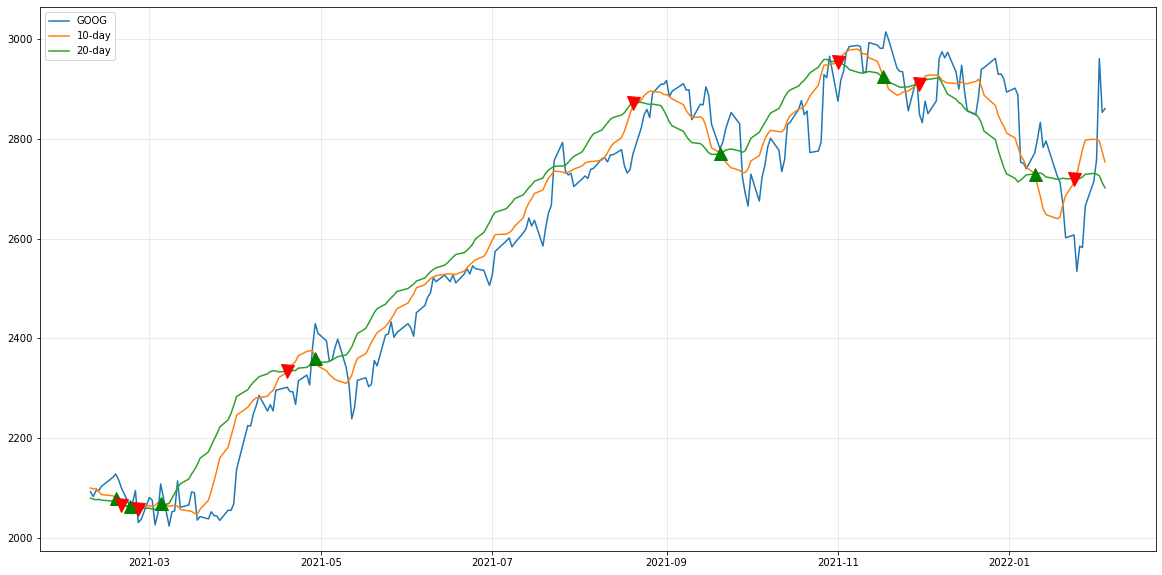

In [12]:
plt.grid(True, alpha = .3)

plt.plot(data.iloc[:plot_range]['close'], label = stock)
plt.plot(data.iloc[:plot_range][shortened], label = shortened)
plt.plot(data.iloc[:plot_range][lengthened], label = lengthened)

# when the signal postively changes -> green arrow up on the '9-Day' line
plt.plot(data[:plot_range].loc[data.entry == 2].index, data[:plot_range][shortened][data.entry == 2], '^', color = 'g', markersize = 13)
# when the signal negatively changes -> red arrow down on the '21-Day' line
plt.plot(data[:plot_range].loc[data.entry == -2].index, data[:plot_range][lengthened][data.entry == -2], 'v', color = 'r', markersize = 13)

plt.legend(loc=2)

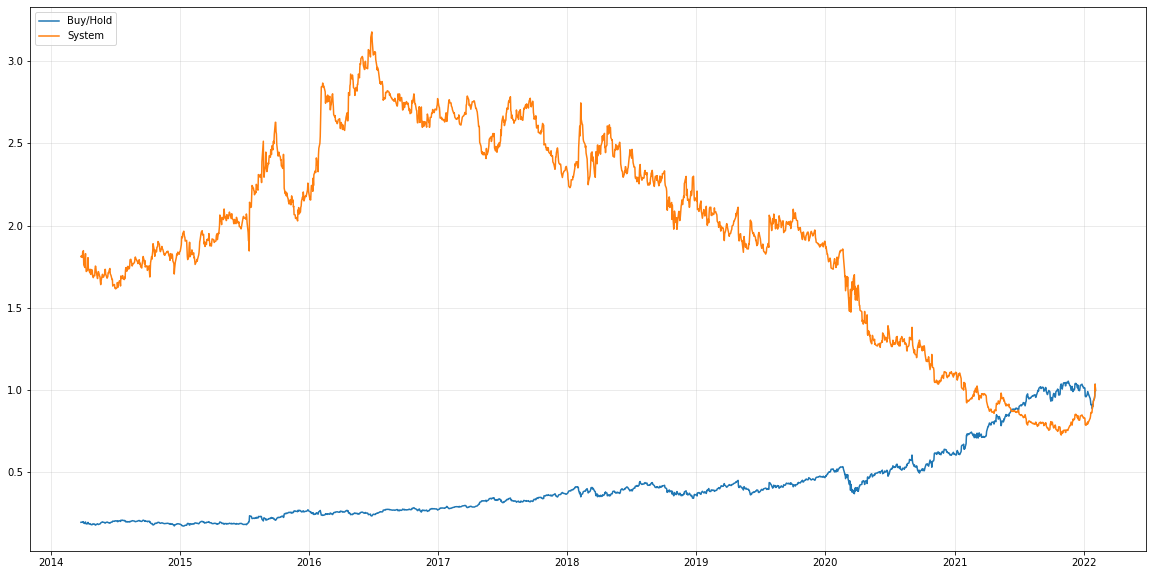

In [13]:
plt.plot(np.exp(data['return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(data['system_return']).cumprod(), label = 'System')
plt.legend(loc=2)
plt.grid(True, alpha = .3)

In [14]:
np.exp(data['return']).cumprod()[-1]-1

-0.804756111204341

In [15]:
np.exp(data['system_return']).cumprod()[-1]-1

0.8109627295362793